In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import sklearn.metrics as metrices
import math

In [37]:
df = pd.read_csv('/content/lstm-TATAMOTORS.NS.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/2/2017,472.000000,488.700012,469.049988,487.049988,4024156.0
1,1/3/2017,491.000000,492.700012,479.899994,481.100006,5814518.0
2,1/4/2017,484.649994,493.700012,484.100006,486.649994,4769872.0
3,1/5/2017,496.000000,503.399994,495.549988,502.149994,7961242.0
4,1/6/2017,502.950012,507.950012,496.250000,497.750000,4907475.0


In [38]:
df.mean()

Open      2.577652e+02
High      2.614799e+02
Low       2.533066e+02
Close     2.569866e+02
Volume    3.332855e+07
dtype: float64

In [39]:
#  df = df.dropna()
df=df.fillna(df.mean())

In [40]:
df = df['Close'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(1028, 1)


array([[487.049988],
       [481.100006],
       [486.649994],
       [502.149994],
       [497.75    ]])

In [41]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(822, 1)
(256, 1)


In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.87210498],
       [0.85980146],
       [0.87127786],
       [0.90332914],
       [0.89423072]])

In [43]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.19179073],
       [0.19272124],
       [0.17648881],
       [0.17493794],
       [0.1638751 ]])

In [44]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [45]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.87210498, 0.85980146, 0.87127786, 0.90332914, 0.89423072,
        0.89919349, 0.93248548, 0.93868895, 0.93662113, 0.92959047,
        0.95347395, 0.9478908 , 0.94530602, 0.96391644, 0.94685688,
        0.96650122, 0.98480142, 1.        , 0.98562859, 0.96567404,
        0.94758057, 0.98624892, 0.9640198 , 0.94561611, 0.95233654,
        0.91294451, 0.92586842, 0.92545483, 0.91863103, 0.90984277,
        0.86176585, 0.7674731 , 0.7872208 , 0.80159221, 0.80676177,
        0.81337877, 0.81627371, 0.82102975, 0.81162111, 0.80944992,
        0.79435482, 0.81968567, 0.81606698, 0.83850283, 0.8317824 ,
        0.82196023, 0.83188583, 0.83498756, 0.83633164, 0.84398261]])

In [46]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.19179073, 0.19272124, 0.17648881, 0.17493794, 0.1638751 ,
        0.16532257, 0.13161702, 0.12427625, 0.13451199, 0.1259305 ,
        0.12499999, 0.10111661, 0.0835401 , 0.0694789 , 0.04693961,
        0.0505583 , 0.03649709, 0.02615797, 0.0210918 , 0.01581885,
        0.02481389, 0.00186103, 0.00672043, 0.01023573, 0.01137304,
        0.01116624, 0.0058933 , 0.01188999, 0.00547972, 0.        ,
        0.00403225, 0.00475599, 0.01923076, 0.01850702, 0.01571546,
        0.01933416, 0.02388336, 0.03132753, 0.01933416, 0.02191894,
        0.02140198, 0.01840363, 0.02057485, 0.02409014, 0.02657154,
        0.05779569, 0.03846153, 0.03225806, 0.03701405, 0.03556658]])

In [47]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [48]:
LSTM??

In [49]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [51]:
from keras import optimizers
optimizer=optimizers.Adam(clipvalue=0.5)
model.compile(loss='mean_squared_error', optimizer=optimizer)


In [60]:

model.fit(x_train, y_train, epochs=70, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/70
25/25 [==============================] - 7s 152ms/step - loss: 0.0015 - accuracy: 0.0013
Epoch 2/70
25/25 [==============================] - 4s 163ms/step - loss: 0.0015 - accuracy: 0.0013
Epoch 3/70
25/25 [==============================] - 4s 160ms/step - loss: 0.0015 - accuracy: 0.0013
Epoch 4/70
25/25 [==============================] - 4s 160ms/step - loss: 0.0013 - accuracy: 0.0013
Epoch 5/70
25/25 [==============================] - 4s 161ms/step - loss: 0.0014 - accuracy: 0.0013
Epoch 6/70
25/25 [==============================] - 4s 161ms/step - loss: 0.0014 - accuracy: 0.0013
Epoch 7/70
25/25 [==============================] - 4s 162ms/step - loss: 0.0013 - accuracy: 0.0013
Epoch 8/70
25/25 [==============================] - 4s 161ms/step - loss: 0.0013 - accuracy: 0.0013
Epoch 9/70
25/25 [==============================] - 4s 165ms/step - loss: 0.0014 - accuracy: 0.0013
Epoch 10/70
25/25 [==============================] - 4s 162ms/step - loss: 0.0014 - accuracy: 0.0013

In [61]:
model = load_model('stock_prediction.h5')

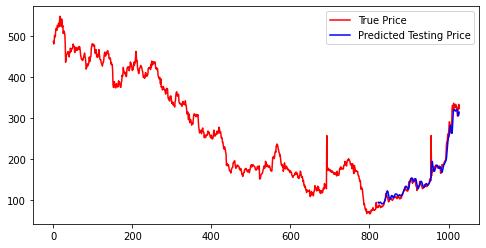

In [62]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

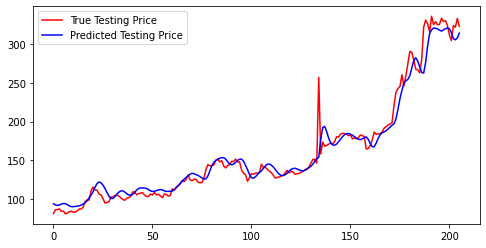

In [63]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()


In [64]:
math.sqrt(metrices.mean_squared_error(y_test_scaled,predictions))

13.226016184835188